<h1>Tugas Data Mining 5</h1>
<br />
<ul>
    <li><b>Nama  : Al-Fariqy Raihan Azhwar</b></li>
    <li><b>NPM   : 202143501514</b></li>
    <li><b>Kelas : R6Q</b></li>
</ul>
<br /><br />
<h3>Tugas :</h3>
<ol>
  <li>Buatlah model regresi linier untuk memprediksi penjualan produk berdasarkan anggaran iklan.</li>
  <li>Hitunglah koefisien regresi dan interpretasikan hasilnya.</li>
  <li>Prediksikan penjualan produk jika anggaran iklan adalah Rp 300.000</li>
</ol>
<br />
<h3>Soal :</h3>
<ul>
  <li>
    Sebuah perusahaan ingin memprediksi penjualan produknya berdasarkan anggaran iklan. Perusahaan tersebut memiliki data penjualan dan anggaran iklan selama 10 bulan terakhir. Data tersebut adalah sebagai berikut :
  </li>
</ul>
<br />

In [ ]:
library(knitr)

df_product <- data.frame(
  bulan = 1:10,
  penjualan_unit = seq(100, 280, by = 20),
  anggaran_iklan = seq(100000, 280000, by = 20000)
)

cat("[ Data Penjualan dan Anggaran selama 10 bulan terakhir ] ")
kable(df_product)

[ Data Penjualan dan Anggaran selama 10 bulan terakhir ] 



| bulan| penjualan_unit| anggaran_iklan|
|-----:|--------------:|--------------:|
|     1|            100|         100000|
|     2|            120|         120000|
|     3|            140|         140000|
|     4|            160|         160000|
|     5|            180|         180000|
|     6|            200|         200000|
|     7|            220|         220000|
|     8|            240|         240000|
|     9|            260|         260000|
|    10|            280|         280000|

<h3>1. Business Understanding</h3>
<br />
<h4>Problems :</h4>
<ul>
  <li>
    Sebuah perusahaan yang bergerak pada bidang digital marketing (anggap saja)ingin memprediksi penjualan produknya berdasarkan anggaran iklan.
  </li>
  <li>
    Perusahaan tersebut memiliki data penjualan dan anggaran iklan selama 10 bulan terakhir.
  </li>
  <li>
    Perusahaan membutuhkan hasil prediksi penjualan unit produk berdasarkan anggaran iklan yang dikeluarkan, agar perusahaan bisa mengambil strategi dalam mengiklankan produk.
  </li>
</ul>
<h4>Objective :</h4>
<ul>
  <li>
    Prediksi penjualan produk jika anggaran iklan.
  </li>
</ul>
<br />

<h3>2. Data Understanding</h3>
<ul>
  <li>
    <b>Bulan (key: <i>bulan</i>)</b> : Daftar Bulan secara incremental
  </li>
  <li>
    <b>Penjualan Unit (key: <i>penjualan_unit</i>)</b> : Daftar penjualan unit yang dihasilkan dalam jangka waktu 1 bulan.
  </li>
  <li>
    <b>Angaran Iklan (key: <i>anggaran_iklan</i>)</b> : Daftar anggaran iklan yang dikeluarkan dalam jangka waktu 1 bulan.
  </li>
</ul>
<br />

<h3>3. Data Preparation</h3>

In [ ]:
summary(df_product)

     bulan       penjualan_unit anggaran_iklan  
 Min.   : 1.00   Min.   :100    Min.   :100000  
 1st Qu.: 3.25   1st Qu.:145    1st Qu.:145000  
 Median : 5.50   Median :190    Median :190000  
 Mean   : 5.50   Mean   :190    Mean   :190000  
 3rd Qu.: 7.75   3rd Qu.:235    3rd Qu.:235000  
 Max.   :10.00   Max.   :280    Max.   :280000  

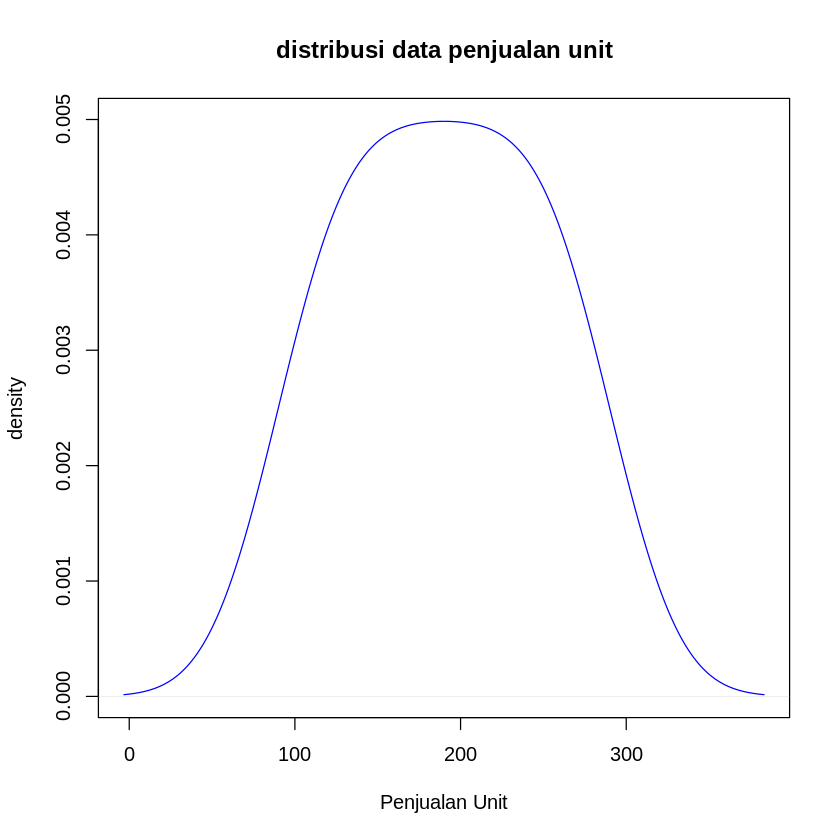

In [ ]:
plot(
  density(df_product$penjualan_unit),
  main = "distribusi data penjualan unit",
  xlab = "Penjualan Unit",
  ylab = "density",
  col  = "blue"
)

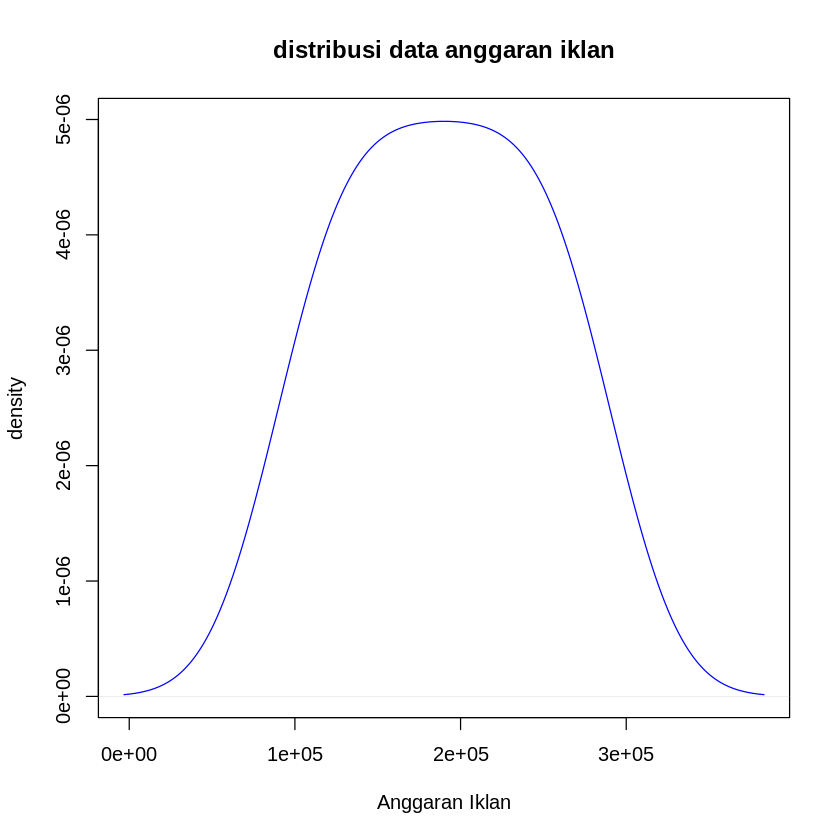

In [ ]:
plot(
  density(df_product$anggaran_iklan),
  main = "distribusi data anggaran iklan",
  xlab = "Anggaran Iklan",
  ylab = "density",
  col  = "blue"
)

In [ ]:
upper_penjualan <- quantile(df_product$penjualan_unit, 0.99)
upper_anggaran  <- quantile(df_product$anggaran_iklan, 0.99)

cleaned_penjualan_unit <- df_product$penjualan_unit[df_product$penjualan_unit <= upper_penjualan]
cleaned_anggaran_iklan <- df_product$anggaran_iklan[df_product$anggaran_iklan <= upper_anggaran]

cleaned_data <- data.frame(
  bulan = df_product$bulan[1:length(cleaned_penjualan_unit)],
  penjualan_unit = cleaned_penjualan_unit,
  anggaran_iklan = cleaned_anggaran_iklan
)

cat('[ Cleaning data dengan metode quantile (0.99) ]')
kable(cleaned_data)

[ Cleaning data dengan metode quantile (0.99) ]



| bulan| penjualan_unit| anggaran_iklan|
|-----:|--------------:|--------------:|
|     1|            100|         100000|
|     2|            120|         120000|
|     3|            140|         140000|
|     4|            160|         160000|
|     5|            180|         180000|
|     6|            200|         200000|
|     7|            220|         220000|
|     8|            240|         240000|
|     9|            260|         260000|

<h3>4. Modeling</h3>

<h4>Menghitung Koefisien Regresi ( $b$ )</h4>
<p>Formula :</p>
<h1>$b = \frac{n(\Sigma \space xy) \space - \space \Sigma(x) \space \Sigma(y)}{n(\Sigma \space x^2) \space - \space \Sigma(x)^2 }$</h1>
<br />

In [ ]:
sigma_x   <- 0
sigma_y   <- 0
sigma_xy  <- 0
sigma_x2  <- 0
sigma_y2  <- 0

for (bulan in seq_along(cleaned_data$bulan)) {
  # Sigma(X)
  sigma_x <- sigma_x + (cleaned_data$penjualan_unit[bulan])

  # Sigma(Y)
  sigma_y <- sigma_y + (cleaned_data$anggaran_iklan[bulan])

  # Sigma(X * Y)
  sigma_xy <- sigma_xy + (
    cleaned_data$penjualan_unit[bulan] * cleaned_data$anggaran_iklan[bulan]
  )

  # Sigma(X^2)
  sigma_x2 <- sigma_x2 + (
    cleaned_data$penjualan_unit[bulan] ^ 2
  )

  # Sigma(Y^2)
  sigma_y2 <- sigma_y2 + (
    cleaned_data$anggaran_iklan[bulan] ^ 2
  )
}

cat(sprintf('Sigma(X)   : %s \n', sigma_x))
cat(sprintf('Sigma(Y)   : %s \n', sigma_y))
cat(sprintf('Sigma(XY)  : %s \n', sigma_xy))
cat(sprintf('Sigma(X^2) : %s \n', sigma_x2))
cat(sprintf('Sigma(Y^2) : %s \n', sigma_y2))

sigma_x_2 <- sigma_x ^ 2
cat(sprintf('Sigma(X)^2 : %s \n', sigma_x_2))

Sigma(X)   : 1620 
Sigma(Y)   : 1620000 
Sigma(XY)  : 315600000 
Sigma(X^2) : 315600 
Sigma(Y^2) : 3.156e+11 
Sigma(X)^2 : 2624400 


In [ ]:
n <- length(cleaned_data$bulan)
cat(sprintf('n : %s \n', n))

b <- ((n * sigma_xy) - (sigma_x * sigma_y)) / ((n * sigma_x2) - (sigma_x^2))
cat(b)

n : 9 
1000

<h4>Menghitung Konstanta ( $a$ )</h4>
<p>Formula :</p>
<h1>$a = \frac{(\Sigma{y}) \space ({\Sigma{x^2}}) \space - \space (\Sigma{x}) \space (\Sigma{xy})}{n(\Sigma \space x^2) \space - \space \Sigma(x)^2 }$</h1>
<br />

In [ ]:
a <- ((sigma_y * sigma_x2) - (sigma_x * sigma_xy)) / ((n * sigma_x2) - (sigma_x^2))

cat(a)

0

<h4>Model Persamaan Regresi Linier</h4>
<p>Formula :</p>
<h1>$y = a \space + \space bx$</h1>
<br />
<h3>* Prediksikan penjualan produk jika anggaran iklan adalah Rp 300.000</h3>

In [ ]:
anggaran_iklan <- 300000
predict        <- (anggaran_iklan + a) / b

cat(
  sprintf(
    '[ OUTPUT ] :\nPenjualan produk diprediksi mencapai total %s unit, \njika anggaran iklan yang dikeluarkan %s',

    predict,
    as.integer(anggaran_iklan)
  )
)

[ OUTPUT ] :
Penjualan produk diprediksi mencapai total 300 unit, 
jika anggaran iklan yang dikeluarkan 300000

<br />
<h3>* Prediksikan anggaran iklan jika produk -nya berhasil terjual 1235 unit</h3>

In [ ]:
terjual  <- 1235
predict  <- a + (b * terjual)

cat(
  sprintf(
    '[ OUTPUT ] :\nAnggaran iklan diprediksi mencapai total %s, \njika produk yang berhasil terjual adalah %s unit',

    predict,
    as.integer(terjual)
  )
)

[ OUTPUT ] :
Anggaran iklan diprediksi mencapai total 1235000, 
jika produk yang berhasil terjual adalah 1235 unit

<br />
<h3>Menghitung korelasi ( $r$ ) dan R-Squared Score ( $r^2$ )</h3>
<p>Formula :</p>
<h1>$r = \frac{n(\Sigma \space xy) \space - \space \Sigma(x) \space \Sigma(y)}{\sqrt{(n(\Sigma{x^2}) - (\Sigma{x})^2) \space (n(\Sigma{y^2}) - (\Sigma{y})^2)}}$</h1>

<h1>$r^2 = (r)^2$</h1>
<br />

In [ ]:
r <- ((n * sigma_xy) - (sigma_x * sigma_y)) / sqrt(
  ((n * sigma_x2) - (sigma_x^2)) * ((n * sigma_y2) - (sigma_y^2))
)

cat(sprintf('R  = %s\n', r))
cat(sprintf('R2 = %s', r^2))

R  = 1
R2 = 1

<br />
<h3>Kesimpulan:</h3>
<h3>100% penjualan produk ditentukan oleh anggaran/budget dari ikan, begitupun sebalik -nya.</h3>